In [125]:
import torch
import torchvision.transforms as transforms
import numpy as np
import random
import os

In [126]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [7]:
# data extraction 
DataPath = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2"
valPath = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/val"
trainPath = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train"

In [42]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((512,512)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((512,512)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

In [ ]:

img_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/images"
mask_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/mask"
images = os.listdir(img_dir)
img_path = os.path.join(img_dir, images[0])
mask_path = os.path.join(mask_dir, images[0])
img_path, mask_path
# images[0]

('/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/images/n0106.jpg',
 '/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/mask/n0106.jpg')

In [47]:
from torch.utils.data import Dataset
from PIL import Image
import os
from torchvision import transforms
import random
import torchvision.transforms.functional as TF

class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None, 
                 img_exts=(".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")):
        """
        Args:
            img_dir: directory with input images
            mask_dir: directory with segmentation masks
            transform: paired transform for (img, mask)
            img_exts: tuple of valid extensions
        """
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.img_exts = img_exts

        # Collect image files with valid extensions
        self.images = [f for f in os.listdir(img_dir) if f.lower().endswith(img_exts)]
        
        # Build mapping from basename → mask path
        self.mask_map = {}
        for f in os.listdir(mask_dir):
            name, _ = os.path.splitext(f)
            self.mask_map[name] = os.path.join(mask_dir, f)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)

        # Match mask by basename
        basename, _ = os.path.splitext(img_name)
        if basename not in self.mask_map:
            raise FileNotFoundError(f"No matching mask found for {img_name}")
        
        mask_path = self.mask_map[basename]

        # Load images
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale mask

        # Apply paired transforms if provided
        if self.transform:
            img, mask = self.transform(img, mask)

        # Convert to tensors
        img = transforms.ToTensor()(img)
        mask = transforms.ToTensor()(mask)

        return img, mask



In [ ]:
from torch.utils.data import DataLoader

train_dataset = SegmentationDataset(
    img_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/images",
    mask_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/mask",
    transform=data_transforms['train']
)
val_dataset = SegmentationDataset(
    img_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/val/images",
    mask_dir = "/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/val/mask",
    transform=data_transforms['val']
)

train_loader = DataLoader(train_dataset, batch_size= 8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size= 8, shuffle=False)


In [54]:
train_loader.dataset[0]

TypeError: Compose.__call__() takes 2 positional arguments but 3 were given

In [ ]:
# DataPreprocessing and Augmentaion (Images and masks) 
from torch.utils.data import DataLoader

train_loader = DataLoader(train_images)

In [ ]:
import matplotlib.pyplot as plt
import cv2
def load_image(img_path):
    """Load an image from a path and convert it to RGB."""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # fill this line of code (convert from BGR to RGB)
    return img

def show_images(img_paths, titles=None, cols=5):
    """Display a set of images in a grid."""
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(img_paths):
        img = load_image(img_path)
        plt.subplot(1, cols, i+1)
        plt.imshow(img)
        plt.axis("on")
        if titles:
            plt.title(titles[i])
    plt.show()


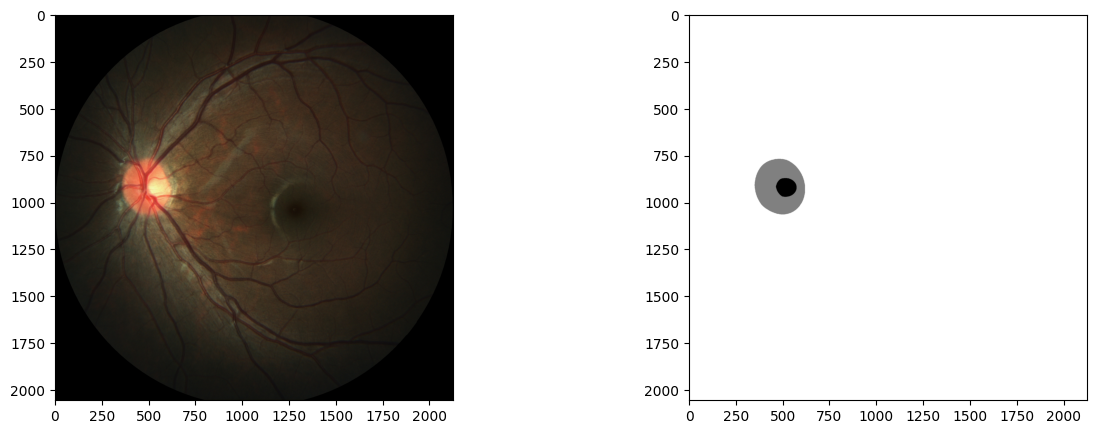

/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/images/n0290.jpg /home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/mask/n0290.bmp


In [9]:
train_images = os.path.join(trainPath, "images", os.listdir(os.path.join(trainPath, "images"))[50])
mask_dir = os.path.join(trainPath, "mask")
image_name = os.path.splitext(train_images)[0]

mask_name = image_name[-5:]
mask_path = os.path.join(mask_dir, mask_name+ ".bmp")

show_images([train_images, mask_path],cols = 2)
print(train_images, mask_path)

In [12]:
import torch
from torchvision import transforms
from PIL import Image
import torchvision.transforms.functional as TF

def horizontal_flip_image(image_path, save_path=None):
    """
    Load an image, apply horizontal flip, and return tensor.
    If save_path is provided, also save flipped image.
    """
    # Load image with PIL
    img = Image.open(image_path).convert("RGB")
    
    # Convert to tensor
    to_tensor = transforms.ToTensor()
    img_tensor = to_tensor(img)
    
    # Flip horizontally
    flipped_tensor = TF.hflip(img_tensor)
    
    # Convert back to PIL (if saving)
    if save_path:
        to_pil = transforms.ToPILImage()
        flipped_img = to_pil(flipped_tensor)
        flipped_img.save(save_path)
    
    return flipped_tensor

# Example usage
flipped = horizontal_flip_image(train_images, save_path="flipped.jpg")
print("Flipped image tensor shape:", flipped.shape)  # [C, H, W]


Flipped image tensor shape: torch.Size([3, 2056, 2124])


In [18]:
from torchvision import transforms

# Define augmentation transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance
    transforms.RandomVerticalFlip(p=0.5),    # 50% chance
    transforms.ToTensor()                    # Convert to tensor [C,H,W]
])

# Example usage
from PIL import Image
img = Image.open(train_images).convert("RGB")

augmented = train_transforms(img)  # Tensor after augmentations
print("Shape:", augmented.shape)


Shape: torch.Size([3, 2056, 2124])


In [13]:
import torchvision.transforms.functional as TF
import random

class RandomFlipPair:
    """Apply same random horizontal/vertical flip to image and mask."""
    def __call__(self, img, mask):
        # Random horizontal flip
        if random.random() > 0.5:
            img = TF.hflip(img)
            mask = TF.hflip(mask)
        
        # Random vertical flip
        if random.random() > 0.5:
            img = TF.vflip(img)
            mask = TF.vflip(mask)
        
        return img, mask


In [14]:
from torch.utils.data import Dataset
from PIL import Image
import os

class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(img_dir)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx])  # same name
        
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale mask
        
        if self.transform:
            img, mask = self.transform(img, mask)
        
        # Convert to tensor
        img = transforms.ToTensor()(img)
        mask = transforms.ToTensor()(mask)
        
        return img, mask

# Usage
dataset = SegmentationDataset("images/", "masks/", transform=RandomFlipPair())


FileNotFoundError: [Errno 2] No such file or directory: 'images/'

In [10]:
import torch
import torchvision.transforms.functional as TF

# Example tensor: CxHxW
# Flip horizontally
def horizontal_flip(img_tensor):
    return TF.hflip(img_tensor)

# For image + mask together
def horizontal_flip_pair(img, mask):
    return TF.hflip(img), TF.hflip(mask)

horizontal_flip(train_images, mask_path)


TypeError: horizontal_flip() takes 1 positional argument but 2 were given

In [143]:
bgr = cv2.imread(train_images)

# Convert BGR → RGB (optional, if you want to start from RGB)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# Convert RGB → LAB
lab_images = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)

print("RGB shape:", rgb.shape)
print("LAB shape:", lab_images.shape)


RGB shape: (2056, 2124, 3)
LAB shape: (2056, 2124, 3)


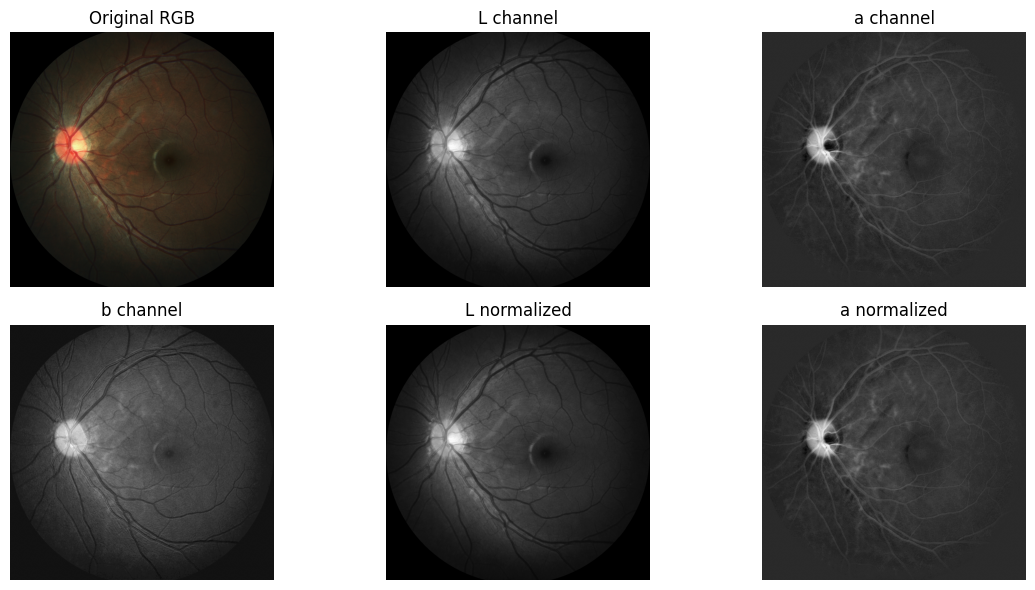

In [145]:
# Split LAB channels
L, A, B = cv2.split(lab_images)

# Normalize for visualization (optional)
L_norm = cv2.normalize(L, None, 0, 255, cv2.NORM_MINMAX)
A_norm = cv2.normalize(A, None, 0, 255, cv2.NORM_MINMAX)
B_norm = cv2.normalize(B, None, 0, 255, cv2.NORM_MINMAX)

# Show results
plt.figure(figsize=(12,6))

plt.subplot(2,3,1); plt.imshow(rgb); plt.title("Original RGB"); plt.axis("off")
plt.subplot(2,3,2); plt.imshow(L, cmap="gray"); plt.title("L channel"); plt.axis("off")
plt.subplot(2,3,3); plt.imshow(A, cmap="gray"); plt.title("a channel"); plt.axis("off")
plt.subplot(2,3,4); plt.imshow(B, cmap="gray"); plt.title("b channel"); plt.axis("off")
plt.subplot(2,3,5); plt.imshow(L_norm, cmap="gray"); plt.title("L normalized"); plt.axis("off")
plt.subplot(2,3,6); plt.imshow(A_norm, cmap="gray"); plt.title("a normalized"); plt.axis("off")

plt.tight_layout()
plt.show()

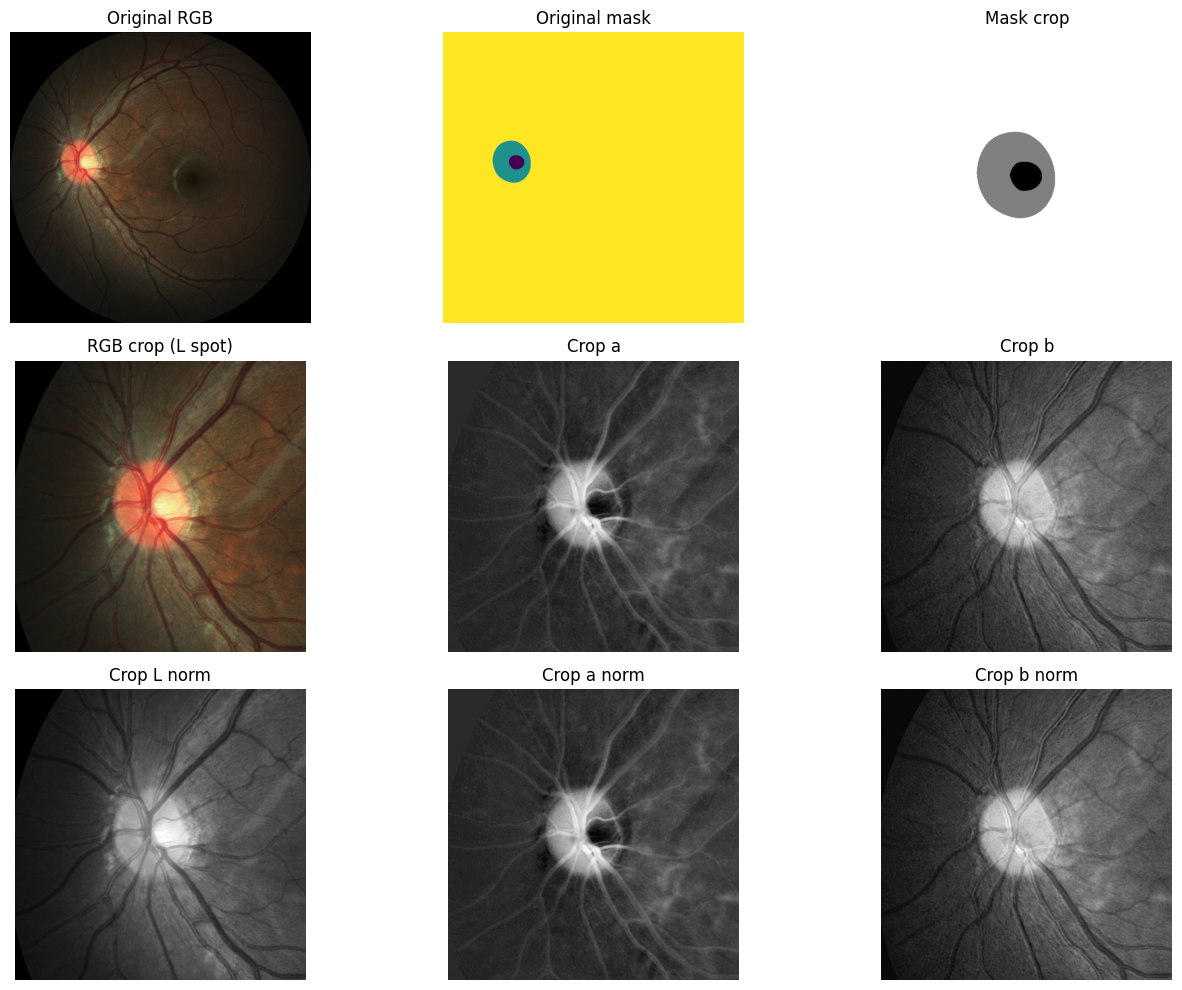

(array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [64, 51, 35],
         [63, 50, 34],
         [62, 49, 33]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [64, 52, 38],
         [63, 51, 35],
         [62, 50, 34]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [63, 51, 37],
         [63, 51, 37],
         [62, 53, 36]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [71, 56, 33],
         [70, 55, 34],
         [71, 56, 35]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [74, 59, 38],
         [72, 57, 38],
         [68, 55, 36]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [71, 58, 39],
         [71, 58, 41],
         [69, 56, 39]]], shape=(1000, 1000, 3), dtype=uint8),
 array([[ 0,  0,  0

In [146]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def crop_brightest_region(channel, crop_size=50):
    """
    Find brightest spot in a channel and crop around it.
    """
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(channel)
    cx, cy = maxLoc  # OpenCV gives (x,y)
    
    h, w = channel.shape
    half = crop_size // 2
    
    # Ensure crop stays within bounds
    x1 = max(cx - half, 0)
    y1 = max(cy - half, 0)
    x2 = min(cx + half, w)
    y2 = min(cy + half, h)
    
    return (x1, y1, x2, y2), channel[y1:y2, x1:x2]

def crop_and_show(img_path, mask_path=None, crop_size=50):
    # Read image
    bgr = cv2.imread(img_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    
    # Read mask if provided
    mask = None
    crop_mask = None
    if mask_path is not None:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Convert to LAB
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
    L, A, B = cv2.split(lab)
    
    # Normalize for visualization
    L_norm = cv2.normalize(L, None, 0, 255, cv2.NORM_MINMAX)
    A_norm = cv2.normalize(A, None, 0, 255, cv2.NORM_MINMAX)
    B_norm = cv2.normalize(B, None, 0, 255, cv2.NORM_MINMAX)
    
    # Crop brightest region based on L
    (x1, y1, x2, y2), crop_L = crop_brightest_region(L, crop_size)
    
    # Crop original image
    crop_rgb = rgb[y1:y2, x1:x2, :]
    
    # Crop channels
    crop_A = A[y1:y2, x1:x2]
    crop_B = B[y1:y2, x1:x2]
    crop_Ln = L_norm[y1:y2, x1:x2]
    crop_An = A_norm[y1:y2, x1:x2]
    crop_Bn = B_norm[y1:y2, x1:x2]
    
    # Crop mask if available
    if mask is not None:
        crop_mask = mask[y1:y2, x1:x2]
    
    # --- Visualization ---
    plt.figure(figsize=(14, 10))
    
    plt.subplot(3, 3, 1); plt.imshow(rgb); plt.title("Original RGB"); plt.axis("off")
    plt.subplot(3, 3, 2); plt.imshow(mask); plt.title("Original mask"); plt.axis("off")

    if crop_mask is not None:
        plt.subplot(3, 3, 3); plt.imshow(crop_mask, cmap="gray"); plt.title("Mask crop"); plt.axis("off")
    
    plt.subplot(3, 3, 4); plt.imshow(crop_rgb); plt.title("RGB crop (L spot)"); plt.axis("off")
    # plt.subplot(3, 3, 4); plt.imshow(crop_L, cmap="gray"); plt.title("Crop L"); plt.axis("off")
    
    plt.subplot(3, 3, 5); plt.imshow(crop_A, cmap="gray"); plt.title("Crop a"); plt.axis("off")
    plt.subplot(3, 3, 6); plt.imshow(crop_B, cmap="gray"); plt.title("Crop b"); plt.axis("off")
    plt.subplot(3, 3, 7); plt.imshow(crop_Ln, cmap="gray"); plt.title("Crop L norm"); plt.axis("off")
    
    plt.subplot(3, 3, 8); plt.imshow(crop_An, cmap="gray"); plt.title("Crop a norm"); plt.axis("off")
    plt.subplot(3, 3, 9); plt.imshow(crop_Bn, cmap="gray"); plt.title("Crop b norm"); plt.axis("off")

    
    plt.tight_layout()
    plt.show()
    
    return crop_rgb, crop_L, crop_A, crop_B, crop_mask


img_path = train_images
mask_pth = mask_path
crop_and_show(img_path, mask_pth, crop_size=1000)



/tmp/ipykernel_57399/2490824093.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(2,3,5); plt.hist(L.ravel(), 256, [0,256], color='blue'); plt.title("Histogram: L original")
/tmp/ipykernel_57399/2490824093.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(2,3,6); plt.hist(L_clahe.ravel(), 256, [0,256], color='green'); plt.title("Histogram: L CLAHE")


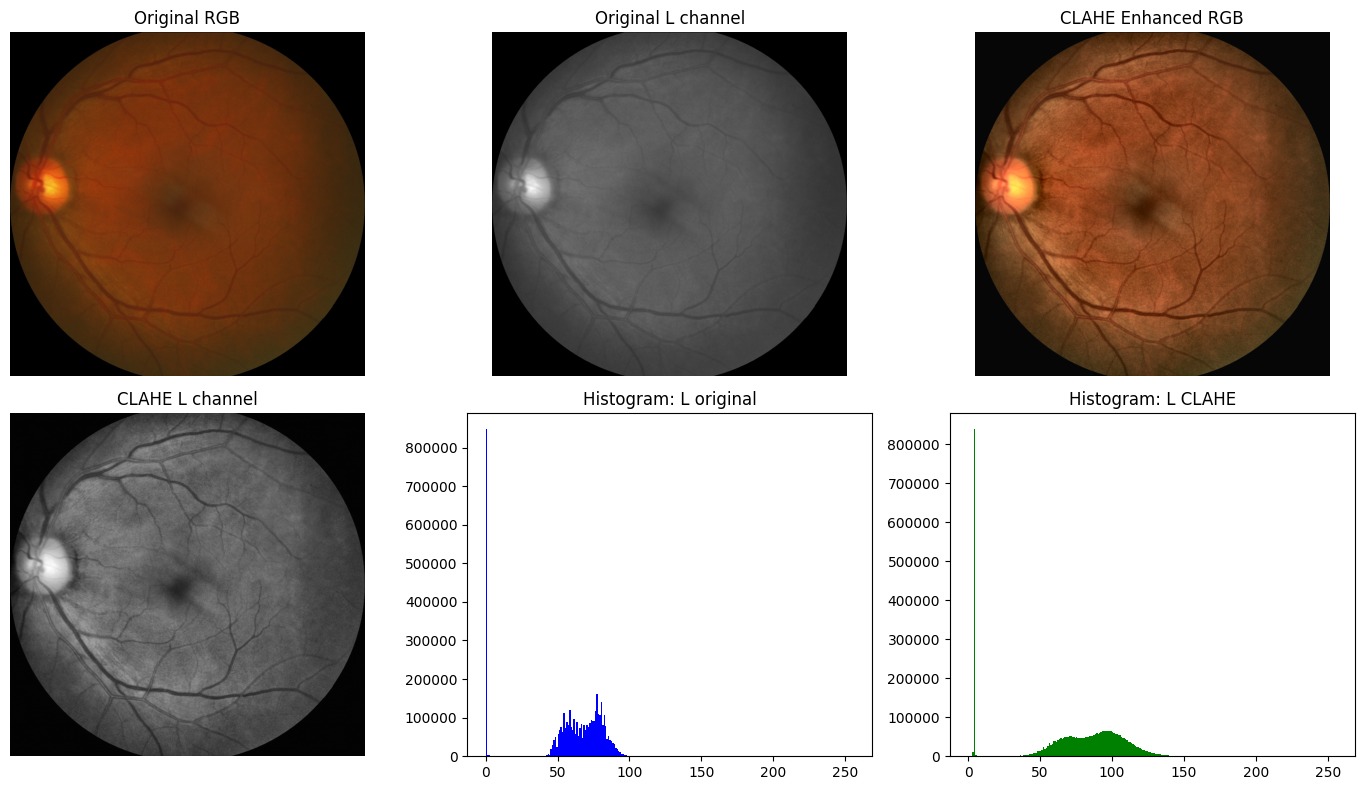

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_CLAHE(image_path, clip_limit=2.0, tile_grid_size=(8,8)):
    # Read image
    bgr = cv2.imread(image_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    
    # Convert to LAB
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
    L, A, B = cv2.split(lab)
    
    # Apply CLAHE on L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    L_clahe = clahe.apply(L)
    
    # Merge channels back
    lab_clahe = cv2.merge((L_clahe, A, B))
    rgb_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)
    
    # --- Visualization ---
    plt.figure(figsize=(14,8))
    
    # Show images
    plt.subplot(2,3,1); plt.imshow(rgb); plt.title("Original RGB"); plt.axis("off")
    plt.subplot(2,3,2); plt.imshow(L, cmap="gray"); plt.title("Original L channel"); plt.axis("off")
    plt.subplot(2,3,3); plt.imshow(rgb_clahe); plt.title("CLAHE Enhanced RGB"); plt.axis("off")
    plt.subplot(2,3,4); plt.imshow(L_clahe, cmap="gray"); plt.title("CLAHE L channel"); plt.axis("off")
    
    # Histograms
    plt.subplot(2,3,5); plt.hist(L.ravel(), 256, [0,256], color='blue'); plt.title("Histogram: L original")
    plt.subplot(2,3,6); plt.hist(L_clahe.ravel(), 256, [0,256], color='green'); plt.title("Histogram: L CLAHE")
    
    plt.tight_layout()
    plt.show()
    
    return rgb_clahe, L, L_clahe

img_path = train_images
enhanced_img, L_orig, L_clahe = apply_CLAHE(img_path, clip_limit=3.0, tile_grid_size=(8,8))


In [ ]:
# Add this code to the END of your existing script to visualize samples

def plot_sample_cases(train_loader, val_loader=None, num_samples=6):
    """
    Simple function to plot sample cases from fundus dataset
    """
    import matplotlib.pyplot as plt
    import torch
    import numpy as np
    
    # Get a batch from training data
    train_iter = iter(train_loader)
    train_images, train_masks = next(train_iter)
    
    # Determine number of rows needed
    if val_loader is not None:
        val_iter = iter(val_loader)
        val_images, val_masks = next(val_iter)
        rows = 4
        fig_title = 'Fundus Dataset: Training and Validation Samples'
    else:
        rows = 2
        fig_title = 'Fundus Dataset: Training Samples'
        val_images = val_masks = None
    
    # Create figure
    fig, axes = plt.subplots(rows, num_samples, figsize=(18, 4 * rows))
    fig.suptitle(fig_title, fontsize=14, y=0.98)
    
    # Helper function to denormalize images
    def denormalize_image(tensor_img):
        img = tensor_img.clone()
        img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img = img + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)
        return img.permute(1, 2, 0).numpy()
    
    # Ensure we have enough samples
    actual_samples = min(num_samples, train_images.shape[0])
    
    # Plot training samples
    for i in range(actual_samples):
        # Training image
        img_np = denormalize_image(train_images[i])
        
        if rows == 2:  # Only training data
            axes[0, i].imshow(img_np)
            axes[0, i].set_title(f'Train Image {i+1}', fontsize=10)
            axes[0, i].axis('off')
            
            # Training mask
            mask_np = train_masks[i].numpy()
            im = axes[1, i].imshow(mask_np, cmap='viridis', vmin=0, vmax=2)
            axes[1, i].set_title(f'Train Mask {i+1}', fontsize=10)
            axes[1, i].axis('off')
        else:  # Training and validation data
            axes[0, i].imshow(img_np)
            axes[0, i].set_title(f'Train Image {i+1}', fontsize=10)
            axes[0, i].axis('off')
            
            # Training mask
            mask_np = train_masks[i].numpy()
            axes[1, i].imshow(mask_np, cmap='viridis', vmin=0, vmax=2)
            axes[1, i].set_title(f'Train Mask {i+1}', fontsize=10)
            axes[1, i].axis('off')
    
    # Plot validation samples if available
    if val_images is not None:
        val_samples = min(actual_samples, val_images.shape[0])
        for i in range(val_samples):
            # Validation image
            img_np = denormalize_image(val_images[i])
            axes[2, i].imshow(img_np)
            axes[2, i].set_title(f'Val Image {i+1}', fontsize=10)
            axes[2, i].axis('off')
            
            # Validation mask
            mask_np = val_masks[i].numpy()
            im = axes[3, i].imshow(mask_np, cmap='viridis', vmin=0, vmax=2)
            axes[3, i].set_title(f'Val Mask {i+1}', fontsize=10)
            axes[3, i].axis('off')
    
    # Add colorbar
    if rows == 2:
        plt.colorbar(im, ax=axes[1, -1], shrink=0.8)
    else:
        plt.colorbar(im, ax=axes[3, -1], shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"\nDataset Information:")
    print(f"Training batch shape - Images: {train_images.shape}, Masks: {train_masks.shape}")
    print(f"Image value range: [{train_images.min():.3f}, {train_images.max():.3f}]")
    print(f"Unique mask values: {torch.unique(train_masks)}")
    
    if val_images is not None:
        print(f"Validation batch shape - Images: {val_images.shape}, Masks: {val_masks.shape}")
        print(f"Val unique mask values: {torch.unique(val_masks)}")

def show_augmentation_example(dataset_path="/home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train"):
    """
    Show a simple augmentation example
    """
    import matplotlib.pyplot as plt
    
    try:
        # Create a simple dataset with augmentation
        train_image_dir = f"{dataset_path}/images"
        train_mask_dir = f"{dataset_path}/mask"
        
        # Create dataset with augmentation
        aug_dataset = FundusDataset(
            image_dir=train_image_dir,
            mask_dir=train_mask_dir,
            transform=get_transforms(train=True),
            augment=True,
            target_size=(128, 128)
        )
        
        # Get one sample with different augmentations
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle('Augmentation Examples', fontsize=14)
        
        for i in range(4):
            # Get augmented sample
            image, mask = aug_dataset[0]  # Same index, different augmentation each time
            
            # Denormalize image for display
            if isinstance(image, torch.Tensor):
                img_np = image.clone()
                img_np = img_np * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
                img_np = img_np + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
                img_np = torch.clamp(img_np, 0, 1)
                img_np = img_np.permute(1, 2, 0).numpy()
            else:
                img_np = np.array(image)
            
            # Plot image
            axes[0, i].imshow(img_np)
            axes[0, i].set_title(f'Augmented {i+1}')
            axes[0, i].axis('off')
            
            # Plot mask
            mask_np = mask.numpy() if isinstance(mask, torch.Tensor) else mask
            axes[1, i].imshow(mask_np, cmap='viridis', vmin=0, vmax=2)
            axes[1, i].set_title(f'Aug Mask {i+1}')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        print("Augmentation examples displayed successfully!")
        
    except Exception as e:
        print(f"Could not show augmentation examples: {e}")

def analyze_class_distribution(data_loader, set_name="Dataset"):
    """
    Analyze class distribution in the dataset
    """
    import matplotlib.pyplot as plt
    from collections import defaultdict
    
    class_counts = defaultdict(int)
    total_pixels = 0
    
    print(f"Analyzing {set_name} class distribution...")
    
    # Sample a few batches to get distribution
    sample_batches = min(5, len(data_loader))
    
    for batch_idx, (images, masks) in enumerate(data_loader):
        if batch_idx >= sample_batches:
            break
            
        for mask in masks:
            unique, counts = torch.unique(mask, return_counts=True)
            for class_id, count in zip(unique, counts):
                class_counts[int(class_id)] += int(count)
                total_pixels += int(count)
    
    # Calculate percentages
    percentages = {k: (v / total_pixels) * 100 for k, v in class_counts.items()}
    
    # Plot distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    class_names = ['Background', 'Optic Cup', 'Optic Disc']
    
    bars = ax1.bar([class_names[i] if i < len(class_names) else f'Class {i}' for i in classes], 
                   counts, alpha=0.7, color=['lightblue', 'orange', 'green'])
    ax1.set_title(f'{set_name} - Class Distribution (Pixel Counts)')
    ax1.set_ylabel('Number of Pixels')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom')
    
    # Pie chart
    pie_labels = [f'{class_names[i] if i < len(class_names) else f"Class {i}"}\n({percentages[i]:.1f}%)' 
                  for i in classes]
    ax2.pie([percentages[i] for i in classes], labels=pie_labels, autopct='', 
            colors=['lightblue', 'orange', 'green'][:len(classes)])
    ax2.set_title(f'{set_name} - Class Distribution (Percentages)')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{set_name} Class Distribution:")
    for class_id in sorted(classes):
        class_name = class_names[class_id] if class_id < len(class_names) else f'Class {class_id}'
        print(f"  {class_name}: {class_counts[class_id]:,} pixels ({percentages[class_id]:.2f}%)")
    
    return class_counts, percentages

# MAIN EXECUTION FUNCTIONS
def run_complete_visualization():
    """
    Run complete visualization - add this to your main script
    """
    print("="*60)
    print("FUNDUS DATASET VISUALIZATION")
    print("="*60)
    
    # First run your existing test
    train_loader, val_loader = test_tiny_model_dataset()
    
    if train_loader is None:
        print("Failed to create data loaders. Please check your paths.")
        return
    
    print(f"\nDataset loaded successfully!")
    print(f"Training batches: {len(train_loader)}")
    if val_loader:
        print(f"Validation batches: {len(val_loader)}")
    
    # 1. Plot sample cases
    print("\n" + "="*40)
    print("1. PLOTTING SAMPLE CASES")
    print("="*40)
    try:
        plot_sample_cases(train_loader, val_loader, num_samples=6)
    except Exception as e:
        print(f"Error plotting samples: {e}")
    
    # 2. Show augmentation examples
    print("\n" + "="*40)
    print("2. SHOWING AUGMENTATION EXAMPLES")
    print("="*40)
    try:
        show_augmentation_example()
    except Exception as e:
        print(f"Error showing augmentations: {e}")
    
    # 3. Analyze class distribution
    print("\n" + "="*40)
    print("3. ANALYZING CLASS DISTRIBUTION")
    print("="*40)
    try:
        analyze_class_distribution(train_loader, "Training Set")
        if val_loader:
            analyze_class_distribution(val_loader, "Validation Set")
    except Exception as e:
        print(f"Error analyzing distribution: {e}")
    
    print("\n" + "="*60)
    print("VISUALIZATION COMPLETE!")
    print("="*60)

def quick_visualization():
    """
    Quick visualization - just the basics
    """
    print("Running quick fundus dataset visualization...")
    
    # Run your existing test
    train_loader, val_loader = test_tiny_model_dataset()
    
    if train_loader is not None:
        print("\nShowing sample images and masks...")
        plot_sample_cases(train_loader, val_loader, num_samples=4)
        
        print("\nAnalyzing training set distribution...")
        analyze_class_distribution(train_loader, "Training Set")
        
        print("Quick visualization complete!")
    else:
        print("Could not load dataset for visualization.")

# ADD THESE LINES TO YOUR EXISTING SCRIPT'S MAIN SECTION:
"""
To use this visualization, add the following to the end of your existing script:

if __name__ == "__main__":
    print("Testing Tiny Model Dataset Implementation...")
    train_loader, val_loader = test_tiny_model_dataset()
    
    # Add this line for complete visualization
    run_complete_visualization()
    
    # OR add this line for quick visualization only
    # quick_visualization()
"""

# STANDALONE USAGE (if running this file separately):
if __name__ == "__main__":
    # Import your existing functions (assuming they're in the same file)
    try:
        # If running as standalone, you need to have the dataset functions available
        print("This script should be added to your existing dataset script.")
        print("Add run_complete_visualization() or quick_visualization() to your main section.")
    except:
        print("Please integrate this code with your existing fundus dataset script.")

Testing Tiny Model Dataset Implementation...
Found 400 images in /home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/train/images
Found 400 images in /home/ankritrisal/Downloads/NAAMIBPEYE/DATASET /GLAUCOMA/REFUGE2/val/images
Training batches: 50
Validation batches: 50



Batch 0:
Images shape: torch.Size([8, 3, 128, 128])
Masks shape: torch.Size([8, 128, 128])
Image range: [-2.118, 2.429]
Mask unique values: tensor([0, 2])


In [6]:
import torch
import torchvision.transforms.functional as TF

# Example tensor: CxHxW
# Flip horizontally
def horizontal_flip(img_tensor):
    return TF.hflip(img_tensor)

# For image + mask together
def horizontal_flip_pair(img, mask):
    return TF.hflip(img), TF.hflip(mask)

horizontal_flip(train_images, mask_pth)


NameError: name 'train_images' is not defined